# Multiple Linear Regression

# Bike Sharing  Assignment

# problem statement : 

* A US bike-sharing  `BoomBikes` has a daily dataset on the rental bikes based on a various environmental and seasonal settings.their aspiration is to use this data to understand the factors affecting the demands for the shared bikes in American market and come up with a mindful buisness plan to able to accelarate their revenue as soon as the ongoing lockdown due to corona pandemic comes to end.


Essentially,the company wants -

* Which variables are significant in predicting the demand for shared bikes.

* How well those variables describe the bike demands



The solution is devided in to following sections :
    
- Data understanding and exploration
    
- Data visualization
    
- Data preparation
    
- Model building and evaluation

# step 1: Reading and understanding the data




Letus start with the following steps :
    
- Importing the data using numpy and pandas library.
- Understanding the structure of the data.
    
        

In [1]:
#supress warning

import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing all the required package

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

In [3]:
# importing dataset

biker=pd.read_csv(r'C:\Users\Welcome\Downloads\PYTHON\BIKE_SHARING_ASSIGNMENT\day.csv',encoding='latin1')
print(biker.head())

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        1           1   
1        2  02-01-2018       1   0     1        0        2           1   
2        3  03-01-2018       1   0     1        0        3           1   
3        4  04-01-2018       1   0     1        0        4           1   
4        5  05-01-2018       1   0     1        0        5           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  


In [4]:
# check the head of the dataset
# Letus take a look at the first few rows

biker.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
# Let's take a look at the number of rows and columns of the dataset

biker.shape

(730, 16)

In [6]:
# understanding the column names in the data frame

biker.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [7]:
# dataset summary : 730 columns,16 rows,no null values
biker.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [8]:
#getting insight of the features of the dataest
biker.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [9]:
#dropping the unwanted columns
#instant has only one index for the row,dteday has date which can be compensated by yr and mnth column
#casual and registered seems to be the break up by category for count column

biker.drop(['instant','dteday','casual','registered',],axis=1,inplace=True)


In [10]:
#encoding the season column
biker.season=biker.season.map({1:'spring',2:'summer',3:'fall',4:'winter'})

In [11]:
biker.weekday=biker.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thurs',5:'fri',6:'sat'})

In [12]:
biker.mnth=biker.mnth.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'jun',7:'jul',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

In [13]:
biker.weathersit=biker.weathersit.map({1:'clear',2:'mix_cloudy',3:'light_snowrain',4:'heavy_snowrain'})

In [14]:
#letus check the head of the dataset
biker.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,mon,1,mix_cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,mix_cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thurs,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,clear,9.305237,11.46350,43.6957,12.522300,1600


In [15]:
biker.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


# STEP 2 : Visualizing the Data

Let's now spend some time doing what is arguably the most important step - **understanding the data**.

- If there is some obvious multicollinearity going on, this is the first place to catch it
    
- Here's where you'll also identify if some predictors directly have a strong association with         the outcome variable
    
We'll visualise our data using `matplotlib` and `seaborn`.



Here we will use following steps:
    

- Visualising Categorical Variables
- Visualising Numeric Variables

**letus import matplotlib.pyplot as plt
import seaborn as sns**

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

**Visualising Categorical Variables**

As you might have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables.



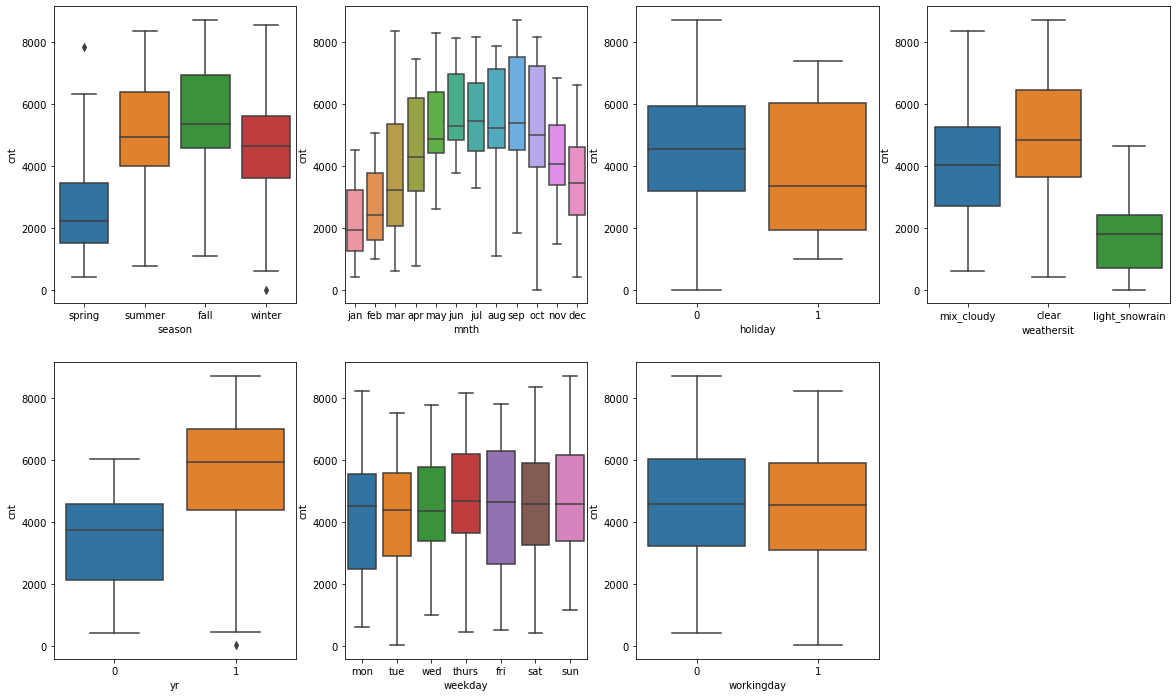

In [17]:
plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = biker)
plt.subplot(2,4,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = biker)
plt.subplot(2,4,3)
sns.boxplot(x = 'holiday', y = 'cnt', data = biker)
plt.subplot(2,4,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = biker)
plt.subplot(2,4,5)
sns.boxplot(x = 'yr', y = 'cnt', data = biker)
plt.subplot(2,4,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = biker)
plt.subplot(2,4,7)
sns.boxplot(x = 'workingday', y = 'cnt', data = biker)

plt.show()


In [18]:
#function to create barplor related to categorical column

def plot_columns(column):
    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    sns.barplot(column,'cnt',data=biker)
    plt.subplot(1,2,2)
    sns.barplot(column,'cnt',data=biker,hue='yr')
    plt.legend(labels=['2018','2019'])
    plt.show()
    

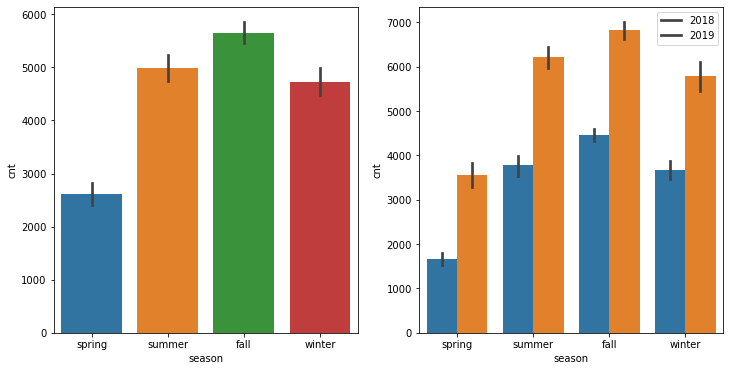

In [19]:
plot_columns('season')

fall season seems to have more booking and in each season the booking count increased drastically from 2018 to 2019.

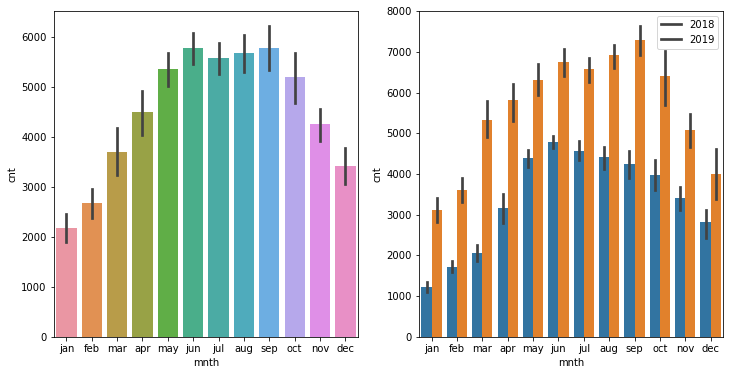

In [20]:
#plotting visualization for mnth column
plot_columns('mnth')

Most of the bookings has been done during the month of may, june, july, aug, sep and oct.Trend increased starting of the year till mid of the year and then it started decreasing as we approached the end of year. Number of booking for each month seems to have increased from 2018 to 2019.

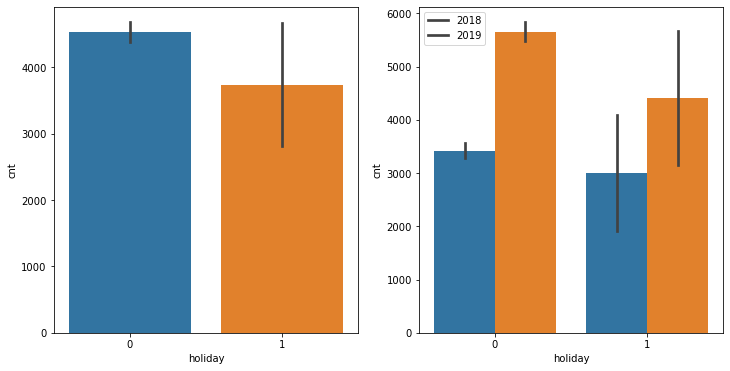

In [21]:
plot_columns('holiday')

When its not holiday, booking seems to be less in number which seems reasonable as on holidays, people may want to spend time at home and enjoy with family.

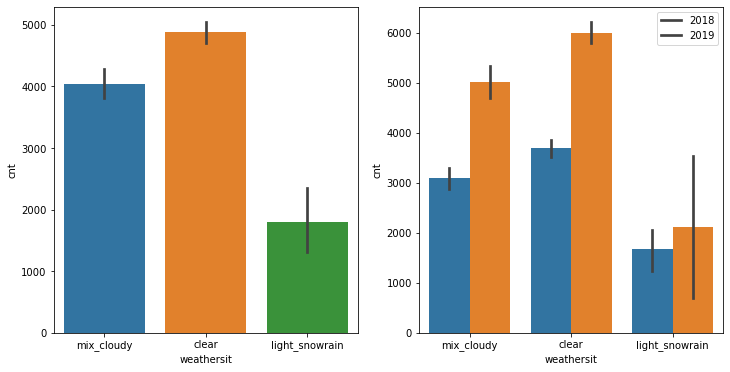

In [22]:
plot_columns('weathersit')

Clear weather attracted more booking, and in comparison to previous year, i.e 2018, booking increased for each weather situation in 2019.

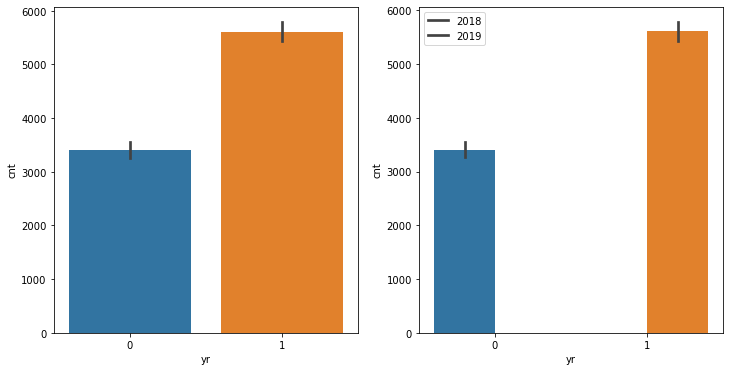

In [23]:
plot_columns('yr')

2019 attracted more number of booking from the previous year, which shows good progress in terms of business.

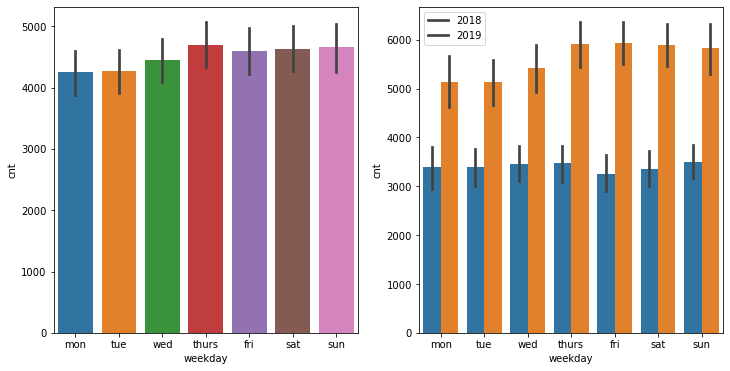

In [24]:
plot_columns('weekday')

Thu, Fir, Sat and Sun have more number of bookings as compared to the start of the week.

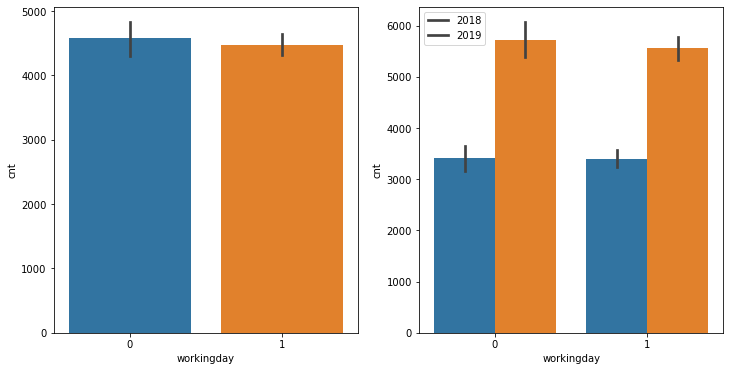

In [25]:
plot_columns('workingday')

Booking seemed to be almost equal either on working day or non-working day. But, the count increased from 2018 to 2019.

**Visualising Numeric Variables**

Let's make a pairplot of all the numeric variables

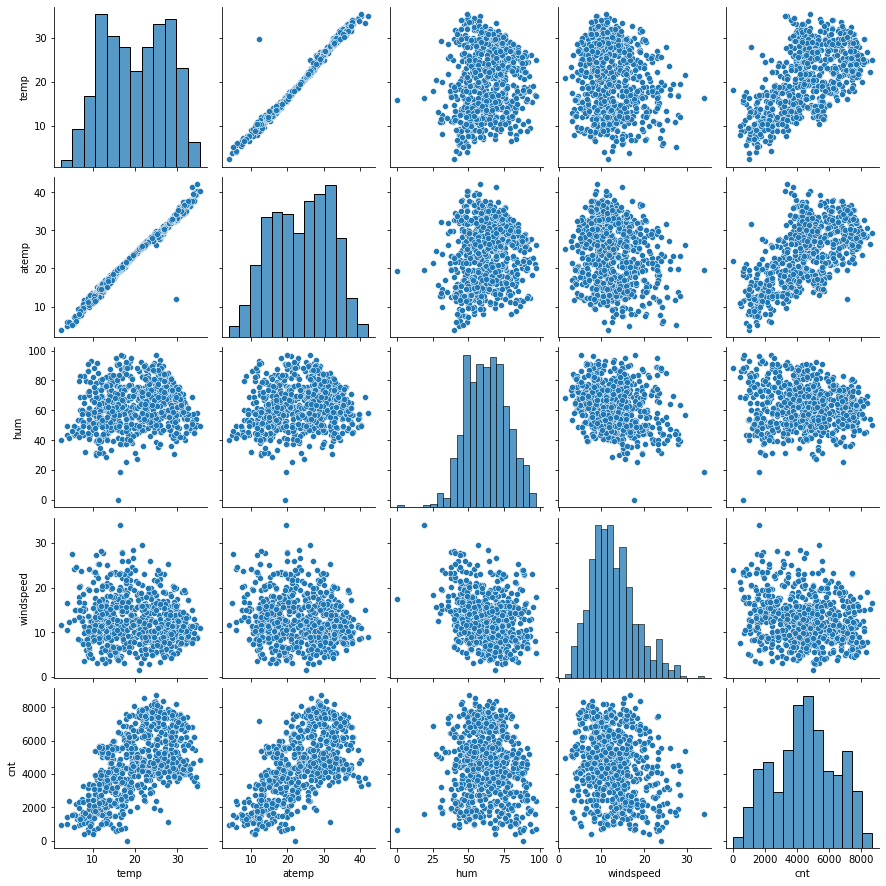

In [26]:
# Analysing/visualizing the numerical columns

sns.pairplot(data=biker,vars=['temp','atemp','hum','windspeed','cnt'])
plt.show()


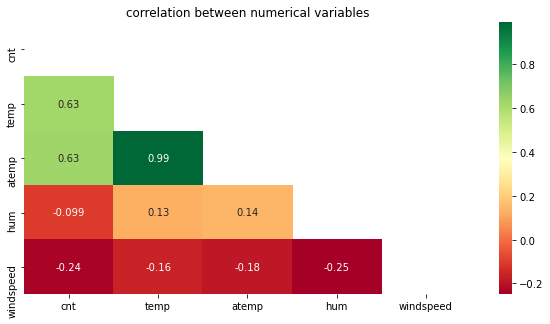

In [27]:
#checking the correlation between numerical variables

plt.figure(figsize=(10,5))
matrix=np.triu(biker[['cnt','temp','atemp','hum','windspeed']].corr())
sns.heatmap(biker[['cnt','temp','atemp','hum','windspeed']].corr(),annot=True,cmap="RdYlGn",mask=matrix)
plt.title('correlation between numerical variables')
plt.show()

**There is linear relationship between temp and atemp. Both of the parameters cannot be used in the model due to multicolinearity. We will decide which parameters to keep based on VIF and p-value w.r.t other variables**.

# Step 3: Data Preparation



Here we will use following steps:

- Splitting the Data into Training and Testing Sets
- Rescaling the Features
- Training the model


In [28]:
#creating dummy vars for mnth,season,weathersit,weekday variable

mnths_biker=pd.get_dummies(biker.mnth,drop_first=True)
season_biker=pd.get_dummies(biker.season,drop_first=True)
weathersit_biker=pd.get_dummies(biker.weathersit,drop_first=True)
weekday_biker=pd.get_dummies(biker.weekday,drop_first=True)

biker.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,mon,1,mix_cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,mix_cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thurs,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,clear,9.305237,11.46350,43.6957,12.522300,1600


In [29]:
#merging the dataframe with the dummy variable dataset

biker_new=pd.concat([biker,mnths_biker,season_biker,weathersit_biker,weekday_biker],axis=1)

In [30]:
biker_new.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,summer,winter,light_snowrain,mix_cloudy,mon,sat,sun,thurs,tue,wed
0,spring,0,jan,0,mon,1,mix_cloudy,14.110847,18.18125,80.5833,...,0,0,0,1,1,0,0,0,0,0
1,spring,0,jan,0,tue,1,mix_cloudy,14.902598,17.68695,69.6087,...,0,0,0,1,0,0,0,0,1,0
2,spring,0,jan,0,wed,1,clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,0,0,1
3,spring,0,jan,0,thurs,1,clear,8.200000,10.60610,59.0435,...,0,0,0,0,0,0,0,1,0,0
4,spring,0,jan,0,fri,1,clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,0,0,0


In [31]:
biker_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          730 non-null    object 
 1   yr              730 non-null    int64  
 2   mnth            730 non-null    object 
 3   holiday         730 non-null    int64  
 4   weekday         730 non-null    object 
 5   workingday      730 non-null    int64  
 6   weathersit      730 non-null    object 
 7   temp            730 non-null    float64
 8   atemp           730 non-null    float64
 9   hum             730 non-null    float64
 10  windspeed       730 non-null    float64
 11  cnt             730 non-null    int64  
 12  aug             730 non-null    uint8  
 13  dec             730 non-null    uint8  
 14  feb             730 non-null    uint8  
 15  jan             730 non-null    uint8  
 16  jul             730 non-null    uint8  
 17  jun             730 non-null    uin

In [32]:
# dropping unnecessary columns as we have already created dummy variable out of it.

biker_new.drop(['season','mnth','weekday','weathersit'], axis = 1, inplace = True)

In [33]:
biker_new.shape

(730, 30)

In [34]:
biker_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   yr              730 non-null    int64  
 1   holiday         730 non-null    int64  
 2   workingday      730 non-null    int64  
 3   temp            730 non-null    float64
 4   atemp           730 non-null    float64
 5   hum             730 non-null    float64
 6   windspeed       730 non-null    float64
 7   cnt             730 non-null    int64  
 8   aug             730 non-null    uint8  
 9   dec             730 non-null    uint8  
 10  feb             730 non-null    uint8  
 11  jan             730 non-null    uint8  
 12  jul             730 non-null    uint8  
 13  jun             730 non-null    uint8  
 14  mar             730 non-null    uint8  
 15  may             730 non-null    uint8  
 16  nov             730 non-null    uint8  
 17  oct             730 non-null    uin

# Splitting the Data into Training and Testing Sets

**As you know, the first basic step for regression is performing a train-test split**.

In [35]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively

np.random.seed(0)
df_train, df_test = train_test_split(biker_new, train_size = 0.7, test_size = 0.3, random_state = 100)

#checking the shape of training dataset
print(df_train.shape)

#checking the shape of testing dataset
print(df_test.shape)

(510, 30)
(219, 30)


# Rescaling the Features

There are two common ways of rescaling:
    
- Min-Max scaling (normalization): it converts data between 0 and 1
- Standardisation (mean-0, sigma-1)
This time, we will use MinMax scaling.

In [36]:
from sklearn.preprocessing import MinMaxScaler

In [37]:
scaler = MinMaxScaler()

In [38]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars=['cnt','temp','atemp','hum','windspeed']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [39]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,summer,winter,light_snowrain,mix_cloudy,mon,sat,sun,thurs,tue,wed
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,0,1,0,0,0,0,0,0,0,1
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,0,0,0,1
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,0,0,0,1,0,0,1,0,0,0
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,0,1,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,...,1,0,0,1,0,0,1,0,0,0


In [40]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,summer,winter,light_snowrain,mix_cloudy,mon,sat,sun,thurs,tue,wed
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537262,0.512989,0.650369,0.320768,0.513620,0.096078,0.084314,...,0.245098,0.24902,0.029412,0.343137,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294
std,0.500429,0.157763,0.453386,0.225844,0.212385,0.145882,0.169797,0.224593,0.294988,0.278131,...,0.430568,0.43287,0.169124,0.475223,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# TRAINING THE MODEL

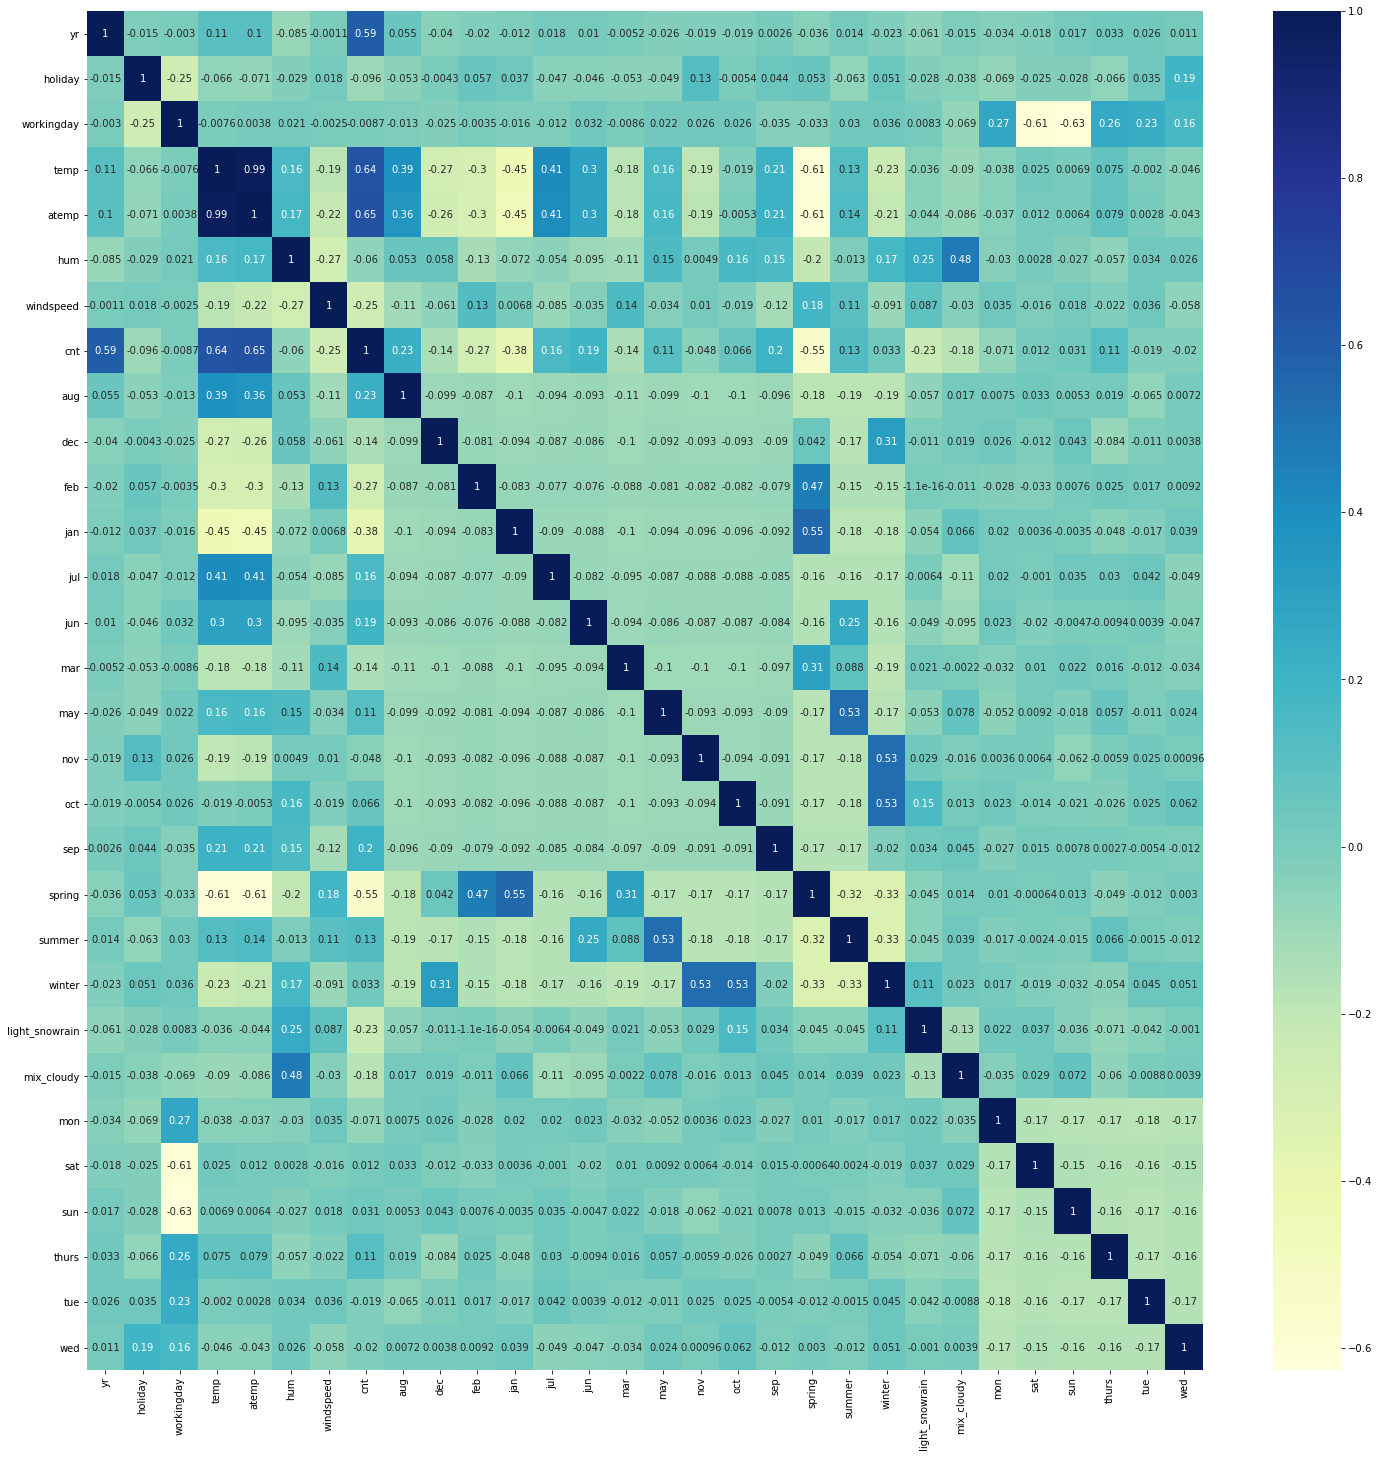

In [41]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (25, 25))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()


cnt seems to have correlation with yr variable and temp. Similarly, Mix_cloudy and hum shows correlation. Spring season with Jan and Feb month, Summer season with may month and Winter season with oct and nov month show good correlation.

In [42]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,summer,winter,light_snowrain,mix_cloudy,mon,sat,sun,thurs,tue,wed
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,0,1,0,0,0,0,0,0,0,1
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,0,0,0,1
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,0,0,0,1,0,0,1,0,0,0
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,0,1,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,...,1,0,0,1,0,0,1,0,0,0


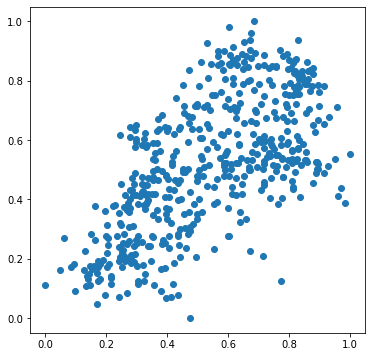

In [43]:
#Visualizing one of the correlation to see the trends via Scatter plot.

plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()


now we can see that positive correlation between temp and cnt.

# step 4:MODEL BUILDING AND EVALUATION

**here we will use following steps**:
    
- Dividing into X and Y sets for the model building
- building a linear model
- Residual Analysis of the train data and validation
- making prediction using the final model
- Model Evaluation

**Dividing into X and Y sets for the model building**

In [44]:
#x_train,y_train
y_train = df_train.pop('cnt')
X_train = df_train

- **building a linear model**

Fit a regression line through the training data using statsmodels. in statsmodel**you need to explicitly fit a constant using sm.add_constant(X) because if we don't perform this step, statsmodels fits a regression line passing through the origin, by default

In [45]:
import statsmodels.api as sm

#recursive feature elimination

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)


In [46]:
#List of variables selected in top 15 list

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('aug', False, 10),
 ('dec', True, 1),
 ('feb', False, 2),
 ('jan', True, 1),
 ('jul', True, 1),
 ('jun', False, 14),
 ('mar', False, 15),
 ('may', False, 7),
 ('nov', True, 1),
 ('oct', False, 12),
 ('sep', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('light_snowrain', True, 1),
 ('mix_cloudy', True, 1),
 ('mon', False, 9),
 ('sat', False, 4),
 ('sun', False, 5),
 ('thurs', False, 13),
 ('tue', False, 8),
 ('wed', False, 11)]

In [47]:
#selecting the selected variables via RFE in column list
 
col = X_train.columns[rfe.support_]
print(col)

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'dec', 'jan', 'jul', 'nov',
       'sep', 'spring', 'summer', 'winter', 'light_snowrain', 'mix_cloudy'],
      dtype='object')


In [48]:
#checking those columns has been rejected

X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'aug', 'feb', 'jun', 'mar', 'may', 'oct', 'mon',
       'sat', 'sun', 'thurs', 'tue', 'wed'],
      dtype='object')

In [49]:
#generic functions to calculate VIF variables

def calculateVIF(biker):
    vif = pd.DataFrame()
    vif['Features'] = biker.columns
    vif['VIF'] = [variance_inflation_factor(biker.values, i) for i in range(biker.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [50]:
#dataframe with rfe selected variables

X_train_rfe = X_train[col]

In [51]:
#calculate VIF
calculateVIF(X_train_rfe)

,Features,VIF
3,hum,30.94
2,temp,17.80
4,windspeed,4.72
10,spring,4.37
12,winter,4.06
11,summer,2.81
14,mix_cloudy,2.32
0,yr,2.09
8,nov,1.83
6,jan,1.75


hum shows high VIF value

**Building Linear Model**

In [52]:
#building 1st linear regression model

X_train_lm_1 = sm.add_constant(X_train_rfe)
lr_1 = sm.OLS(y_train,X_train_lm_1).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Wed, 06 Oct 2021   Prob (F-statistic):          3.34e-189
Time:                        12:30:17   Log-Likelihood:                 514.72
No. Observations:                 510   AIC:                            -997.4
Df Residuals:                     494   BIC:                            -929.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3202      0.036      8.

In [53]:
# As humidity shows high VIF values hence we can drop it
X_train_new = X_train_rfe.drop(['hum'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,temp,5.17
3,windspeed,4.67
11,winter,2.94
9,spring,2.89
10,summer,2.23
0,yr,2.07
7,nov,1.80
5,jan,1.66
6,jul,1.59
13,mix_cloudy,1.56


VIF values seems good this time,but we can check if we reduce further.

In [54]:
# Building 2nd linear regression model

X_train_lm_2 = sm.add_constant(X_train_new)
lr_2 = sm.OLS(y_train,X_train_lm_2).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     185.4
Date:                Wed, 06 Oct 2021   Prob (F-statistic):          1.57e-186
Time:                        12:30:17   Log-Likelihood:                 505.61
No. Observations:                 510   AIC:                            -981.2
Df Residuals:                     495   BIC:                            -917.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2466      0.032      7.

In [55]:
# We can drop nov variable as it has high p-value
X_train_new = X_train_new.drop(['nov'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,temp,5.14
3,windspeed,4.62
8,spring,2.89
9,summer,2.23
0,yr,2.07
10,winter,2.06
5,jan,1.65
6,jul,1.59
12,mix_cloudy,1.56
7,sep,1.34


VIF doesnt seems to be affected much after dropping few of the variables. Lets proceed more to observe better model.

In [56]:
# Building 3rd linear regression model

X_train_lm_3 = sm.add_constant(X_train_new)
lr_3 = sm.OLS(y_train,X_train_lm_3).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.8
Date:                Wed, 06 Oct 2021   Prob (F-statistic):          1.20e-186
Time:                        12:30:17   Log-Likelihood:                 503.13
No. Observations:                 510   AIC:                            -978.3
Df Residuals:                     496   BIC:                            -919.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2288      0.031      7.

In [57]:
# We can drop dec variable as it has high p-value
X_train_new = X_train_new.drop(['dec'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,temp,5.13
3,windspeed,4.61
7,spring,2.75
8,summer,2.22
0,yr,2.07
9,winter,1.79
4,jan,1.61
5,jul,1.59
11,mix_cloudy,1.56
6,sep,1.34


In [58]:
# Building 4th linear regression model

X_train_lm_4 = sm.add_constant(X_train_new)
lr_4 = sm.OLS(y_train,X_train_lm_4).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     213.1
Date:                Wed, 06 Oct 2021   Prob (F-statistic):          3.97e-187
Time:                        12:30:17   Log-Likelihood:                 501.48
No. Observations:                 510   AIC:                            -977.0
Df Residuals:                     497   BIC:                            -921.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2155      0.030      7.

In [59]:
# We can drop jan variable as it has high p-value
X_train_new = X_train_new.drop(['jan'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,temp,5.09
3,windspeed,4.60
7,summer,2.21
6,spring,2.08
0,yr,2.07
8,winter,1.79
4,jul,1.58
10,mix_cloudy,1.55
5,sep,1.34
9,light_snowrain,1.08


In [60]:
# Building 5th linear regression model

X_train_lm_5 = sm.add_constant(X_train_new)
lr_5 = sm.OLS(y_train,X_train_lm_5).fit()
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.4
Date:                Wed, 06 Oct 2021   Prob (F-statistic):          2.40e-187
Time:                        12:30:17   Log-Likelihood:                 499.17
No. Observations:                 510   AIC:                            -974.3
Df Residuals:                     498   BIC:                            -923.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1996      0.030      6.

In [61]:
# We can drop july variable as it has high p-value
X_train_new = X_train_new.drop(['jul'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
3,windspeed,4.59
2,temp,3.84
0,yr,2.07
5,spring,1.99
6,summer,1.89
7,winter,1.63
9,mix_cloudy,1.54
4,sep,1.23
8,light_snowrain,1.08
1,holiday,1.04


now VIF value seems to be good as it came below 5.

In [62]:
# Building 6th linear regression model

X_train_lm_6 = sm.add_constant(X_train_new)
lr_6 = sm.OLS(y_train,X_train_lm_6).fit()
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     249.2
Date:                Wed, 06 Oct 2021   Prob (F-statistic):          7.36e-187
Time:                        12:30:17   Log-Likelihood:                 495.16
No. Observations:                 510   AIC:                            -968.3
Df Residuals:                     499   BIC:                            -921.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1910      0.030      6.

We can cosider the above model i.e lr_6, as it seems to have very low multicolinearity between the predictors and the p-values for all the predictors seems to be significant.
F-Statistics value of 249.2 (which is greater than 1) and the p-value of 7.36e-187,it states that the overall model is significant


In [63]:
#checking the parameters and their coefficient values
lr_6.params

const             0.190994
yr                0.234060
holiday          -0.096865
temp              0.478177
windspeed        -0.148155
sep               0.090932
spring           -0.055092
summer            0.060987
winter            0.095929
light_snowrain   -0.286002
mix_cloudy       -0.080124
dtype: float64

# Residual Analysis of the train data and validation

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [64]:
X_train_lm_6

,const,yr,holiday,temp,windspeed,sep,spring,summer,winter,light_snowrain,mix_cloudy
653,1.0,1,0,0.509887,0.300794,0,0,0,1,0,0
576,1.0,1,0,0.815169,0.264686,0,0,0,0,0,0
426,1.0,1,0,0.442393,0.255342,0,1,0,0,0,1
728,1.0,1,0,0.245101,0.663106,0,1,0,0,0,0
482,1.0,1,0,0.395666,0.188475,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
526,1.0,1,0,0.824514,0.355596,0,0,1,0,0,1
578,1.0,1,0,0.863973,0.187140,0,0,0,0,0,0
53,1.0,0,0,0.202618,0.111379,0,1,0,0,0,0
350,1.0,0,0,0.248216,0.431816,0,0,0,1,0,1


In [65]:
y_train_pred = lr_6.predict(X_train_lm_6)

Text(0.5, 0, 'Errors')

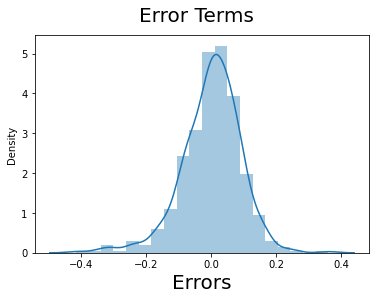

In [66]:
#plot the histogram for the error terms
fig=plt.figure()
sns.distplot(y_train-y_train_pred,bins=20)
fig.suptitle('Error Terms',fontsize=20)
plt.xlabel('Errors',fontsize=20)

Error terms are following normal distribution

**Multi Collinearity**

In [67]:
calculateVIF(X_train_new)

,Features,VIF
3,windspeed,4.59
2,temp,3.84
0,yr,2.07
5,spring,1.99
6,summer,1.89
7,winter,1.63
9,mix_cloudy,1.54
4,sep,1.23
8,light_snowrain,1.08
1,holiday,1.04


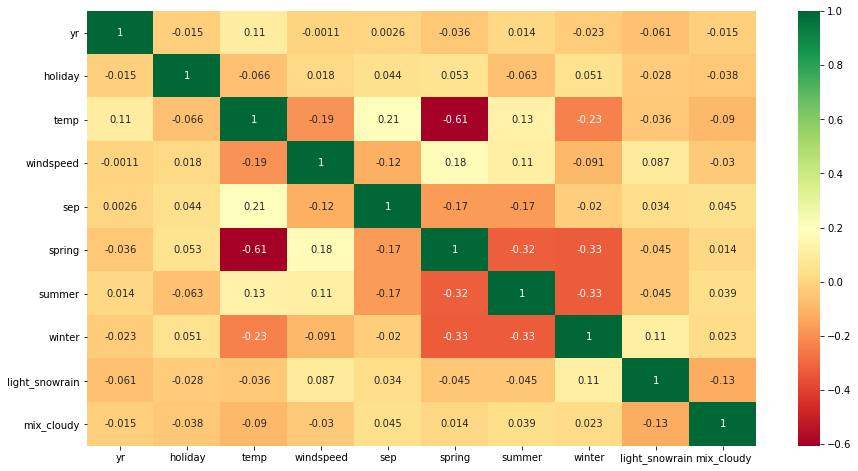

In [68]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train_new.corr(),annot = True, cmap="RdYlGn")
plt.show()

VIF values are less than 5 which is good and also there is no multicolinearity as seen from the heatmap.

**Linearity**

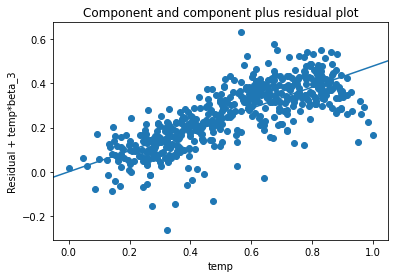

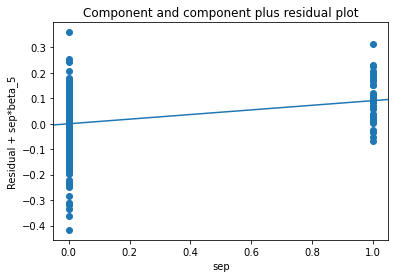

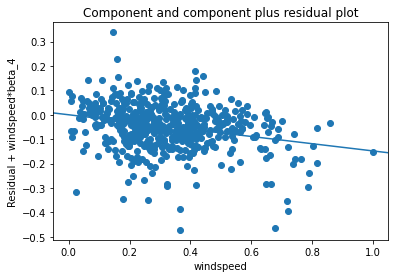

In [69]:
# Linear relationship validation using Component and component plus residual plot/CCPR plot


sm.graphics.plot_ccpr(lr_6, 'temp')
plt.show()

sm.graphics.plot_ccpr(lr_6, 'sep')
plt.show()

sm.graphics.plot_ccpr(lr_6, 'windspeed')
plt.show()

Linearity can be observed from above visualizations.

**Homoscedacity**

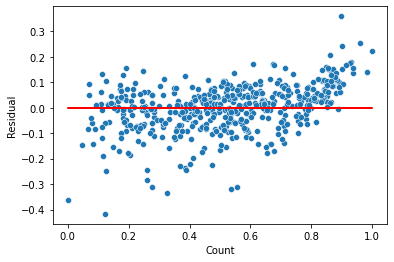

In [70]:
y_train_pred = lr_6.predict(X_train_lm_6)
residual = y_train - y_train_pred
sns.scatterplot(y_train,residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

No visible pattern observed from above plot for residuals.

Durbin-Watson value of final model lr_6 is  2.076, which signifies there is no autocorrelation.

# making prediction using the final model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. 6th model.

 **Applying the scaling on the test sets**

In [71]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,summer,winter,light_snowrain,mix_cloudy,mon,sat,sun,thurs,tue,wed
184,0,1,0,0.000897,0.937470,1.570915,0.056255,193.808492,0,0,...,0,0,0,1,0,0,0,0,0,1
535,1,0,1,0.001160,1.021894,1.450588,0.078579,199.199044,0,0,...,1,0,0,0,0,0,0,1,0,0
299,0,0,0,-0.000314,0.620835,2.030337,0.136540,85.227374,0,0,...,0,1,0,1,0,1,0,0,0,0
221,0,0,1,0.001085,0.967202,1.009763,0.138263,153.283093,1,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.000842,0.904837,0.696918,0.201802,159.315377,0,0,...,1,0,0,0,0,1,0,0,0,0


In [72]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,summer,winter,light_snowrain,mix_cloudy,mon,sat,sun,thurs,tue,wed
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.639269,-0.000136,0.663490,1.522877,0.129842,145.806324,0.059361,0.086758,...,0.264840,0.232877,0.027397,0.319635,0.118721,0.173516,0.155251,0.141553,0.123288,0.155251
std,0.500722,0.188034,0.481313,0.000885,0.252238,0.379527,0.051368,60.920734,0.236840,0.282125,...,0.442259,0.423633,0.163612,0.467403,0.324202,0.379560,0.362974,0.349389,0.329520,0.362974
min,0.000000,0.000000,0.000000,-0.002076,0.076514,0.563467,0.015460,14.059253,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,-0.000910,0.445574,1.239475,0.092963,105.907200,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,-0.000137,0.682251,1.495438,0.125381,146.833682,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.000621,0.873188,1.791447,0.158650,188.241464,0.000000,0.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,0.001474,1.182051,2.449286,0.288534,269.276220,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Dividing into X_test and y_test**

In [73]:
y_test = df_test.pop('cnt')
X_test = df_test

In [74]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test

col1 = X_train_new.columns

X_test = X_test[col1]

# Adding constant variable to test dataframe
X_test_lm_6 = sm.add_constant(X_test)

In [75]:
y_pred = lr_6.predict(X_test_lm_6)

In [76]:
r2 = r2_score(y_test, y_pred)
round(r2,4)

-5.7289

# Model Evaluation

**Let's now plot the graph for actual versus predicted values**.

Text(0, 0.5, 'y_pred')

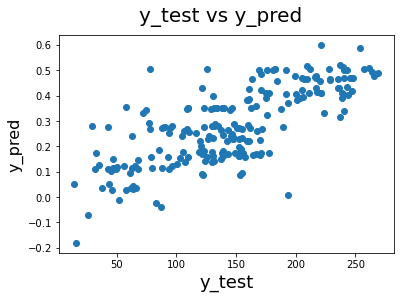

In [77]:
# Plotting y_test and y_pred to understand the spread.

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16)

In [78]:
round(lr_6.params,4)

const             0.1910
yr                0.2341
holiday          -0.0969
temp              0.4782
windspeed        -0.1482
sep               0.0909
spring           -0.0551
summer            0.0610
winter            0.0959
light_snowrain   -0.2860
mix_cloudy       -0.0801
dtype: float64

In [79]:
#calculating adjusted r squared value for the best dataset

adjusted_r2= round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

-6.0524


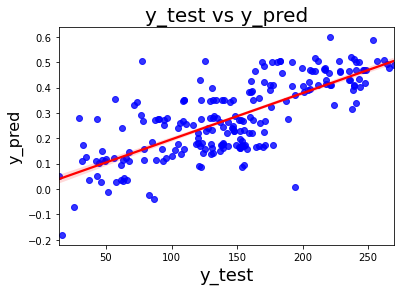

In [80]:
# Visualizing the fit on the test data
# plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

**Comparision between Training and Testing dataset**:

**cnt** = 0.1910 + (0.2341)*yr + (-0.0969)*holiday + (0.4782)*temp + (-0.1482)*windspeed + (0.0909)*sep + (-0.2860)*light_snowrain + (-0.0801)*mix_cloudy + (-0.0551)*spring + (0.0610)*summer + (0.0959)*winter 

- Train dataset R^2          : 0.833
- Test dataset R^2           : -5.7289
- Train dataset Adjusted R^2 :  0.830   
- Test dataset Adjusted R^2  : -6.0524

**Demand of bikes depend on yr, holiday, temp, windspeed, sep, Light_snowrain, Mix_cloudy, spring, summer and winter**.